In [9]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

#sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/')
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%load_ext autoreload
%autoreload 2
import getdist
from getdist import plots, MCSamples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
analysis.analysis

{'1': {'name': 'unbinnedSSC',
  'likelihood': 'unbinnedSSC',
  'redshift_bins': [0.2, 1.2],
  'logm_bins': [14.2, 15.6],
  'where_to_save': '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/'},
 '2': {'name': 'unbinnedstandard',
  'likelihood': 'unbinnedstd',
  'redshift_bins': [0.2, 1.2],
  'logm_bins': [14.2, 15.6],
  'where_to_save': '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/'},
 '3': {'name': 'P18',
  'likelihood': 'P18',
  'redshift_bins': [0.2, 1.2],
  'logm_bins': [14.2, 15.6],
  'where_to_save': '/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/'}}

In [12]:
samples = []
names = ['1', '2']
labels =  [r'\Omega_m', r'\sigma_8']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':5, 'smooth_scale_1D':5, 'boundary_correction_order':0}
z = []
for i in range(3):
    i = i+1
    try:
        n = analysis.analysis[str(i)]['name']
        samplei = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/_' + n+'.npy')
        samples.append(MCSamples(samples=samplei[10000:],names = names, 
                                                                labels = labels, 
                                                                 settings=settings, 
                                                                 label=n))
    except:a=1


Removed no burn in
Removed no burn in
Removed no burn in


In [13]:
import matplotlib.pylab as pl
colors = plt.cm.get_cmap('cividis', 3)
c = [colors(i) for i in range(3)]

/tmp/ipykernel_25068/4150534857.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('cividis', 3)


In [14]:
range_ = {'1':[.25, .39], '2':[.8, .9], '3':[0.9, 1]}

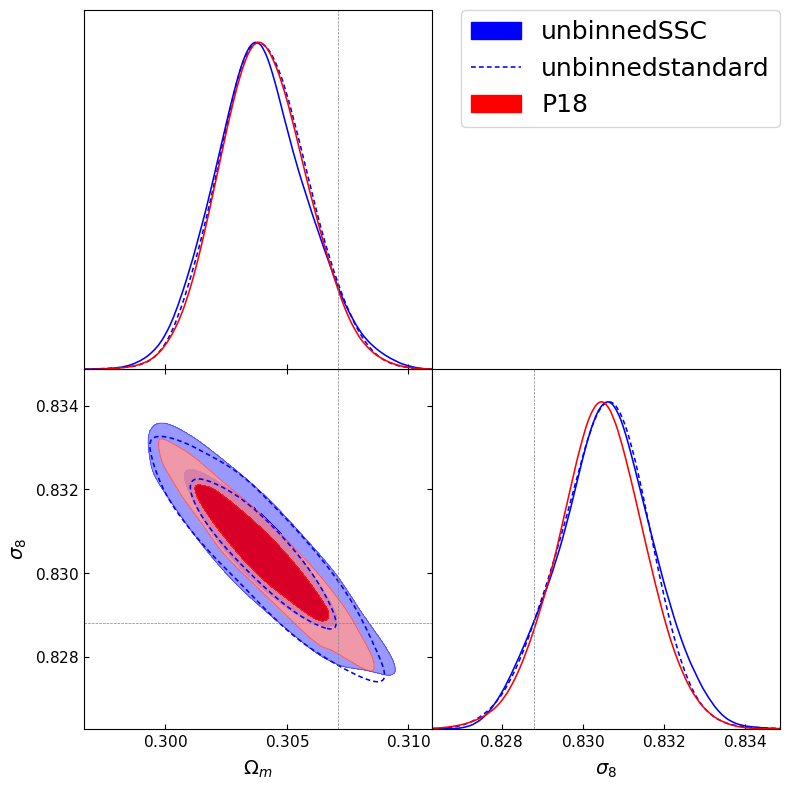

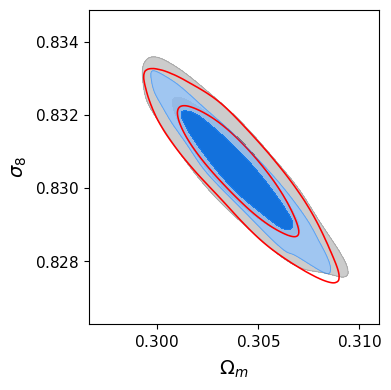

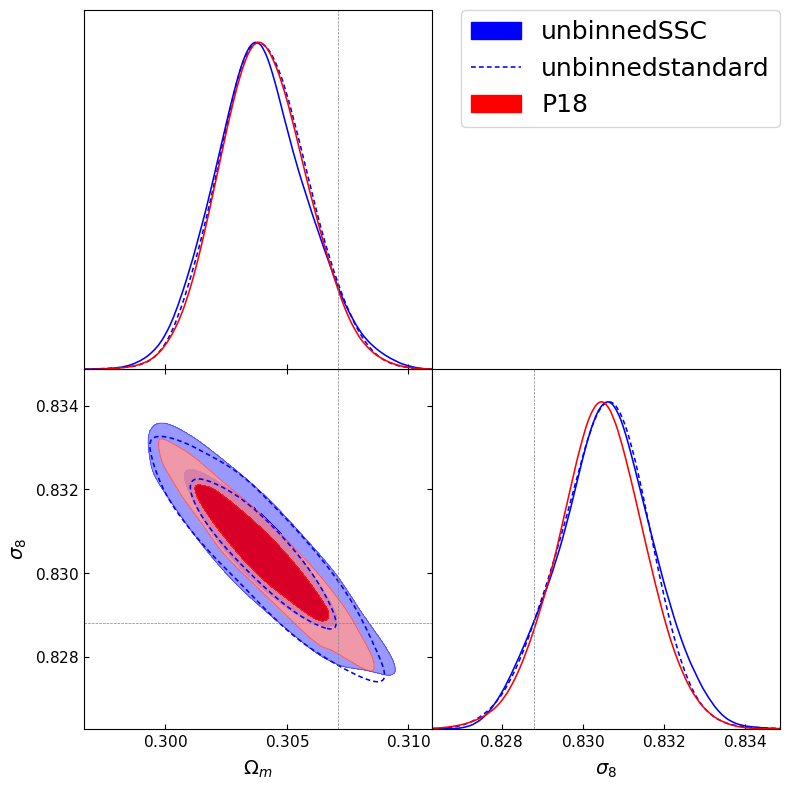

In [15]:
g = plots.get_subplot_plotter(subplot_size=4)
g.settings.legend_fontsize = 18
#plt.style.use('dark_background')
g.triangle_plot([ samples[0], samples[1], samples[2]],
                filled = [ True, False, True],
                contour_colors = ['b', 'b', 'r', 'm',],
                contour_ls=['-', '--', '-', '-'],markers={'1':0.30711, '2':.8288, '3':0.96})
#plt.savefig('unbinned_SSC_partialm.png', dpi = 300,bbox_inches='tight')
#samples_noSSC[7], samples_noSSC[8], samples_SSC[5],samples_SSC[6], samples_SSC[7], samples_SSC[8]],)

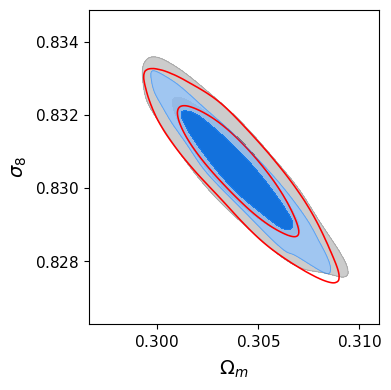

In [17]:
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([ samples[0], samples[1], samples[2]], '1', '2', filled = [ True, False, True],
                contour_colors = ['k', 'k', 'r', 'm',],
                contour_ls=['-', '--', '-', '-'],markers={'1':0.30711, '2':.8288, '3':0.96});